<a href="https://colab.research.google.com/github/ayushya19/hand_sign_detection_keras/blob/master/handsigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes




def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y






In [ ]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes=load_dataset()

y = 0


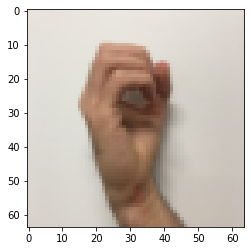

In [ ]:
#This is just to see our data
index = 20
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
#Normalizing your data
X_train=X_train_orig/255
X_test=X_test_orig/255
Y_train=Y_train_orig/255
Y_test=Y_test_orig/255

#converting your result to a 6 row index with one of being 1 and the rest being 0
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

#Find the dimensions of the training data and testing data
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))





number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [ ]:
#Initialize your network
classifier=Sequential()

In [ ]:
#add layers to your networks use input shape for your input without the no. of datas
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=6,activation='softmax'))

#compile the networks
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
   #conver the data to an array
   n_train=1080  
   train_X_del = np.asarray([X_train[i,:,:,:] for i in range(n_train)])
   train_y_del = np.asarray([Y_train[i] for i in range(n_train)])

In [ ]:
#Train the model at the size of batch_size times the input shape given in the network
classifier.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1080/1080 [==============================] - 7s 7ms/step - loss: 1.7288 - accuracy: 0.2861
Epoch 2/100
1080/1080 [==============================] - 0s 222us/step - loss: 1.1432 - accuracy: 0.5944
Epoch 3/100
1080/1080 [==============================] - 0s 212us/step - loss: 0.7852 - accuracy: 0.7315
Epoch 4/100
1080/1080 [==============================] - 0s 212us/step - loss: 0.5580 - accuracy: 0.8222
Epoch 5/100
1080/1080 [==============================] - 0s 224us/step - loss: 0.4121 - accuracy: 0.8806
Epoch 6/100
1080/1080 [==============================] - 0s 215us/step - loss: 0.3062 - accuracy: 0.9083
Epoch 7/100
1080/1080 [==============================] - 0s 211us/step - loss: 0.2105 - accuracy: 0.9407
Epoch 8/100
1080/1080 [==============================] - 0s 211us/step - loss: 0.1764 - accuracy: 0.9491
Epoch 9/100
1080/1080 [==============================] - 0s 216us/step - loss: 0.1259 - accuracy: 0.9685
Epoch 10/100
1080/1080 [==============================] -

In [ ]:
#Try to predict the test data
result=classifier.predict(X_test,batch_size=32)

In [ ]:
result

array([[9.99986529e-01, 1.34569746e-05, 1.63157736e-08, 4.27567676e-10,
        1.46843232e-11, 7.06639816e-11],
       [9.99964118e-01, 3.20664039e-05, 3.79308835e-06, 5.80700643e-09,
        1.35485666e-12, 4.13061196e-10],
       [9.99999642e-01, 6.39633500e-20, 5.68712188e-08, 1.32414479e-08,
        2.56162849e-07, 6.94458122e-14],
       [2.64160493e-13, 1.69624593e-18, 3.59427287e-16, 3.04258350e-07,
        4.49377410e-11, 9.99999642e-01],
       [1.91427176e-07, 9.99553025e-01, 4.46689985e-04, 5.71044243e-13,
        9.80902772e-12, 2.29394886e-17],
       [1.00000000e+00, 3.66277427e-24, 1.72360320e-10, 1.74564844e-13,
        1.10913570e-10, 7.12951933e-17],
       [7.15077920e-16, 2.15914806e-08, 4.60952838e-11, 9.94925618e-01,
        5.39453875e-04, 4.53489833e-03],
       [5.96560011e-15, 9.99998927e-01, 1.08516133e-06, 2.10385051e-12,
        2.38289271e-12, 1.01160651e-20],
       [8.12097126e-16, 1.73334329e-13, 4.20985025e-09, 7.50347817e-06,
        7.42406072e-03, 

In [ ]:
firstrslt=result[71]
firstrslt.max()

0.94736356

In [ ]:
print(list(firstrslt).index(firstrslt.max()))

4


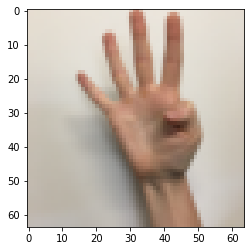

In [ ]:
plt.imshow(X_test[71])

In [ ]:

loss,metrics=classifier.evaluate(X_test,Y_test,batch_size=32)

120/120 [==============================] - 0s 190us/step


In [ ]:
print(loss)
print(metrics)

0.3471617410580317
0.925000011920929


In [ ]:
from IPython.display import display, Javascript

from google.colab.output import eval_js

from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):

  js = Javascript('''

  async function takePhoto(quality) {

  const div = document.createElement('div');

  const capture = document.createElement('button');

  capture.textContent = 'Capture';

  div.appendChild(capture);

  const video = document.createElement('video');

  video.style.display = 'block';

  const stream = await navigator.mediaDevices.getUserMedia({video: true});

  document.body.appendChild(div);

  div.appendChild(video);

  video.srcObject = stream;

  await video.play();

  // Resize the output to fit the video element.

  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  // Wait for Capture to be clicked.

  await new Promise((resolve) => capture.onclick = resolve);

  const canvas = document.createElement('canvas');

  canvas.width = video.videoWidth;

  canvas.height = video.videoHeight;

  canvas.getContext('2d').drawImage(video, 0, 0);

  stream.getVideoTracks()[0].stop();

  div.remove();

  return canvas.toDataURL('image/jpeg', quality);

  }

  ''')

  display(js)

  data = eval_js('takePhoto({})'.format(quality))

  binary = b64decode(data.split(',')[1])

  with open(filename, 'wb') as f:

    f.write(binary)

    return filename

    from IPython.display import Image

    try:

      filename = take_photo()

      print('Saved to {}'.format(filename))

      # Show the image which was just taken.

      display(Image(filename))

    except Exception as err:

    # Errors will be thrown if the user does not have a webcam or if they do not

    # grant the page permission to access it.

      print(str(err))

      from google.colab.patches import cv2_imshow

      !curl -o logo.png

      import cv2

      img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)

      cv2_imshow(img)
      plt.imshow(img)

In [ ]:
take_photo("photo.jpg",0.9)

<IPython.core.display.Javascript object>

'photo.jpg'

In [ ]:

from PIL import Image 
  
filename = "/content/photo.jpg"
with Image.open(filename) as image: 
    width, height = image.size 
    new_image = image.resize((64, 64))
    new_image.save('image_400.jpg')


In [ ]:
list(classifier.predict(np.expand_dims(new_image,axis=0))[0]).index(max(classifier.predict(np.expand_dims(new_image,axis=0))[0]))

1

In [ ]:
print()